<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [149]:
def scatterplot(X_,Y_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('Componente principal 1',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('Componente principal 2',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

In [150]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,ytitle_,xtitle_,namefile_):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel(xtitle_, color=LETRASNARA, fontsize='large')
    ax1.set_ylabel(ytitle_, color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    plt.plot(serie_)
    plt.savefig(namefile_, transparent=True)         
    plt.show()

In [151]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path        = 'https://drive.google.com/uc?export=download&id=' 
URL_Eolicas = 'https://drive.google.com/file/d/1FNMdGkhjypcGTAtPeOfw12EuAolUJ4Fh/view?usp=sharing'
df_Eolicas  = pd.read_csv(path + URL_Eolicas.split('/')[-2], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35] ) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,], 1,2,3,4,5,6,7,8,9,10,11,12,13,15,
df_Eolicas.dropna(inplace=True)
#df_Eolicas.head()


In [152]:
X = df_Eolicas.to_numpy()
X = StandardScaler().fit_transform(X)

95.67253291174362


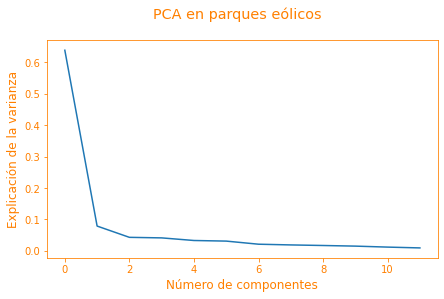

In [153]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(.95) 
pca.fit(X)
x_pca = pca.transform(X)
print(sum(pca.explained_variance_ratio_ * 100))
print_serie(pca.explained_variance_ratio_,'PCA en parques eólicos  \n','Explicación de la varianza','Número de componentes','fig_t14__variance_pca')

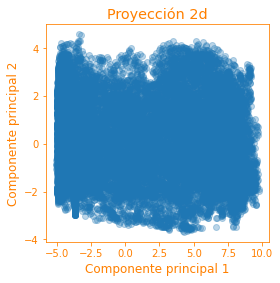

In [154]:
## Proyección en 2 dimensiones 
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents,columns = ['PC1', 'PC2'])
scatterplot(principalDf['PC1'],principalDf['PC2'],'Proyección 2d','fig_t14_Proy2D')

In [155]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html?highlight=factor%20analysis#
factor = FactorAnalysis(n_components=2, random_state=0)
X_factor = factor.fit_transform(X)
X_factor.shape

(26346, 2)

[link text](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f)

Análisis de componentes principales y Análisis factorial son métodos de reducción de dimensiones y su función es escoger un subconjunto de variables que expliquen la mayor varianza, es decir que representen en mayor medida los datos originales. Las variables eliminadas serán redundates con otras que llamaremos latentes o factores en el método de Analisis factorial o componentes en el PCA. 